 ## Trabajo N.º 3 
##  Modelamiento de patrones sísmicos en Chile mediante regresión, clasificación y clustering jerárquico



### Abstract

Este trabajo integra y extiende los análisis realizados en las Evaluaciones 1 y 2 sobre la actividad sísmica en Chile, utilizando el mismo conjunto de datos de eventos registrados por el Centro Sismológico Nacional entre 2012 y 2025. El objetivo central es comparar el rendimiento e interpretabilidad de distintos modelos de regresión, incorporar árboles de decisión tanto regresivos como lógicos, y aplicar técnicas de clustering jerárquico para identificar patrones de agrupamiento en la magnitud, profundidad y localización de los sismos.

A partir de las variables numéricas principales (Latitude, Longitude, Depth, Magnitude) y de la etiqueta derivada zona_sismica, se construyen y evalúan modelos de regresión lineal y basados en árboles, así como un árbol de decisión de clasificación y clústeres jerárquicos en variantes aditiva y divisiva. Los resultados permiten contrastar los modelos de las evaluaciones anteriores, visualizar reglas de decisión explícitas y descubrir grupos de eventos con comportamientos similares. Finalmente, se formulan conclusiones y recomendaciones de negocio orientadas a mejorar la interpretación de los patrones sísmicos y apoyar la priorización de zonas de vigilancia.


## 1. Introducción

Chile es uno de los países con mayor actividad sísmica del mundo, lo que convierte a la medición, análisis y comunicación de los sismos en un problema permanente de seguridad y de gestión del riesgo. En las Evaluaciones 1 y 2 se trabajó con un conjunto de datos del Centro Sismológico Nacional, explorando la distribución de magnitudes y profundidades, comparando macrozonas y desarrollando modelos de regresión y clasificación básicos.

En esta tercera entrega se retoma el mismo dataset, pero con un foco más integrado y reflexivo. Nuestro interés no es solo aplicar nuevas técnicas, sino también comparar lo realizado anteriormente y preguntarse qué modelos aportan mayor capacidad de explicación y apoyo a la toma de decisiones. Este trabajo busca profundizar la comprensión de cómo variables como latitud, longitud, profundidad y magnitud se relacionan entre sí, y cómo los modelos pueden ayudar a mejorar la detección de patrones relevantes para la gestión sísmica.

La integración de árboles de decisión y clustering jerárquico permite avanzar hacia modelos más interpretables, donde las reglas y los agrupamientos puedan explicarse de manera sencilla a usuarios no técnicos, manteniendo al mismo tiempo una base cuantitativa sólida.


## 2. Planteamiento del problema y pregunta de investigación

Chile es uno de los países con mayor actividad sísmica del mundo. La magnitud, ubicación y profundidad de los eventos están registradas de forma sistemática por el Centro Sismológico Nacional (CSN), pero esta información suele utilizarse de manera descriptiva y no siempre se explotan sus patrones mediante técnicas de análisis de datos.

Desde la perspectiva de Business Intelligence, surge la necesidad de entender mejor cómo se comportan los sismos según su localización geográfica y sus características físicas, para apoyar la comunicación del riesgo y la toma de decisiones a nivel territorial.

**Pregunta de investigación:**

> ¿En qué medida los modelos de regresión, clasificación y clustering jerárquico aplicados sobre datos históricos del CSN permiten describir y segmentar los patrones de sismicidad en Chile, de forma coherente con las macrozonas sísmicas tradicionales (Norte, Centro, Sur)?


## Hipótesis

**H1.** Los modelos basados en árboles de decisión (regresión y clasificación) describen mejor los patrones de magnitud y de macrozona sísmica que la regresión lineal utilizada en las evaluaciones anteriores, al capturar relaciones no lineales entre latitud, longitud, profundidad y magnitud.

**H2.** El clustering jerárquico sobre las variables Latitude, Longitude, Depth y Magnitude genera grupos de sismos que son coherentes con las macrozonas sísmicas Norte, Centro y Sur, permitiendo proponer segmentaciones útiles para la comunicación y gestión del riesgo.


## Objetivo general y objetivos específicos

**Objetivo general**

Aplicar y comparar modelos de regresión, clasificación y clustering jerárquico sobre un registro histórico de sismos en Chile, con el fin de identificar patrones de sismicidad y evaluar su coherencia con las macrozonas sísmicas tradicionales.

**Objetivos específicos**

1. Comparar el rendimiento de una regresión lineal y de un árbol de decisión regresivo para predecir la magnitud de los sismos a partir de la latitud, longitud y profundidad, evaluando métricas de error y capacidad explicativa.

2. Construir y evaluar un árbol de decisión lógico y un modelo híbrido Random Forest para clasificar la variable categórica zona_sismica, derivando un árbol lógico manual que pueda comunicarse fácilmente a usuarios no técnicos.

3. Aplicar técnicas de clustering jerárquico (enfoques aglomerativo y divisivo) sobre las variables numéricas del dataset y analizar la correspondencia entre los clústeres obtenidos y las macrozonas sísmicas Norte, Centro y Sur.


## 3. Equipos, software y librerías utilizadas

### 3.1 Equipo de trabajo

El análisis se realizó en computadores con las siguientes características relevantes para el procesamiento de datos:

- Procesador Intel Core i7
- Memoria RAM 16 GB 
- Unidad de almacenamiento sólido (SSD) de 512 GB y 1 TB
- Tarjetas de video: Intel UHD Graphics Xe (integrada) y NVIDIA GeForce RTX 3060
- Sistema operativo Windows 10 de 64 bits.

Estas especificaciones permiten trabajar de forma fluida con notebooks de Python, manejar dataframes de tamaño medio y ejecutar modelos de Machine Learning de complejidad moderada sin problemas de rendimiento.

### 3.2 Software, entorno de desarrollo y trabajo colaborativo

- Lenguaje: Python 3.12.10.
- Entorno de desarrollo: Visual Studio Code con la extensión de Jupyter Notebook.
- Sistema de control de versiones: Git y GitHub.
- Cliente de escritorio: GitHub Desktop para sincronizar el repositorio entre distintos computadores de trabajo.
- Estructura de carpetas:
  - data/: contiene el archivo seismic_data.csv con los registros sísmicos.
  - figuras/: almacena las imágenes generadas por los gráficos del análisis.

El proyecto se gestionó mediante un repositorio en GitHub, utilizando GitHub Desktop para realizar commit, push y pull de los cambios entre equipos. Visual Studio Code se utilizó como editor principal para desarrollar el notebook, gestionar ramas cuando fue necesario y revisar el historial de versiones, lo que facilitó el trabajo colaborativo.

### 3.3 Librerías principales

Las librerías de Python más utilizadas en este trabajo son:

- pandas y numpy para manipulación y preparación de datos.
- matplotlib y seaborn para visualización de gráficos descriptivos y comparativos.
- scikit-learn para construcción y evaluación de modelos de regresión, árboles de decisión, clasificación y clustering jerárquico.
- nbformat e ipykernel como soporte para la ejecución reproducible del notebook.

Las versiones específicas de estas dependencias se encuentran documentadas en el archivo requirements.txt del proyecto.



In [8]:
# =============================================================================
# 4. CONFIGURACIÓN GENERAL DEL PROYECTO
# =============================================================================

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos y opciones de Pandas
plt.style.use("default")
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

# Directorios base
DATA_DIR = "data"
FIG_DIR = "figuras"

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)

def guardar_figura(fig, nombre):
    """
    Guarda una figura en la carpeta 'figuras' con nombre <nombre>.png
    """
    ruta = os.path.join(FIG_DIR, f"{nombre}.png")
    fig.savefig(ruta, dpi=300, bbox_inches="tight")
    print(f"Figura guardada en: {ruta}")


In [9]:
# =============================================================================
# 5. CARGA DEL DATASET SÍSMICO
# =============================================================================

NOMBRE_ARCHIVO = "seismic_data.csv"
ruta_csv = os.path.join(DATA_DIR, NOMBRE_ARCHIVO)

if not os.path.exists(ruta_csv):
    raise FileNotFoundError(
        f"No se encontró el archivo '{ruta_csv}'. "
        "Verifique que el CSV esté dentro de la carpeta 'data/'."
    )

print(f"Cargando dataset desde: {ruta_csv}")
df = pd.read_csv(ruta_csv)

print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
display(df.head())


Cargando dataset desde: data\seismic_data.csv
Filas: 4018, Columnas: 5


,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2025-05-26 03:50:27,-19.6300,-69.4900,97,5.6000
1,2025-05-13 00:47:58,-51.2500,-72.2800,28,5.1000
2,2025-05-05 09:46:48,-29.4900,-71.8400,48,5.0000
3,2025-05-05 02:17:48,-31.8900,-70.8800,88,5.1000
4,2025-05-02 15:23:49,-27.5200,-72.4800,30,5.8000


In [10]:
# =============================================================================
# 6. PREPARACIÓN INICIAL DE VARIABLES
# =============================================================================

# Conversión de fecha a tipo datetime
df["Date"] = pd.to_datetime(df["Date(UTC)"], errors="coerce")

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.to_period("M").astype(str)
df["Day"] = df["Date"].dt.day

def zona_por_lat(lat):
    """
    Asigna una macrozona sísmica aproximada según la latitud:
    - Norte: lat >= -23
    - Centro: -38 <= lat < -23
    - Sur: lat < -38
    """
    if pd.isna(lat):
        return np.nan
    if lat >= -23:
        return "Norte"
    elif lat <= -38:
        return "Sur"
    else:
        return "Centro"

df["zona_sismica"] = df["Latitude"].apply(zona_por_lat)

print("Distribución de la variable 'zona_sismica':")
print(df["zona_sismica"].value_counts(dropna=False))
display(df[["Date", "Latitude", "Longitude", "Depth", "Magnitude", "zona_sismica"]].head())


Distribución de la variable 'zona_sismica':
zona_sismica
Centro    2637
Norte     1266
Sur        115
Name: count, dtype: int64


,Date,Latitude,Longitude,Depth,Magnitude,zona_sismica
0,2025-05-26 03:50:27,-19.6300,-69.4900,97,5.6000,Norte
1,2025-05-13 00:47:58,-51.2500,-72.2800,28,5.1000,Sur
2,2025-05-05 09:46:48,-29.4900,-71.8400,48,5.0000,Centro
3,2025-05-05 02:17:48,-31.8900,-70.8800,88,5.1000,Centro
4,2025-05-02 15:23:49,-27.5200,-72.4800,30,5.8000,Centro


## 4. Comparativa de modelos de regresión

En esta sección se comparan dos enfoques de regresión aplicados a la magnitud de los sismos, utilizando como variables explicativas la latitud, longitud y profundidad:

- Un modelo de regresión lineal con variables estandarizadas, que representa el enfoque más clásico utilizado en las evaluaciones anteriores.
- Un árbol de decisión regresivo, que introduce el uso de modelos basados en reglas y particiones del espacio de atributos.

El objetivo es evaluar el rendimiento predictivo de cada modelo y discutir sus diferencias en términos de error, capacidad de ajuste e interpretabilidad.


In [11]:
# =============================================================================
# 4.1 Definición de modelos de regresión y evaluación comparativa
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Selección de variables
# ------------------------------
features_reg = ["Latitude", "Longitude", "Depth"]
target_reg = "Magnitude"

df_reg = df.dropna(subset=features_reg + [target_reg]).copy()
X = df_reg[features_reg]
y = df_reg[target_reg]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Modelo 1: Regresión lineal (enfoque Evaluaciones 1 y 2)
# ------------------------------
modelo_lineal = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("regressor", LinearRegression())
    ]
)

# ------------------------------
# Modelo 2: Árbol de decisión regresivo )
# ------------------------------
modelo_arbol = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_leaf=20
)

# Entrenamiento
modelo_lineal.fit(X_train, y_train)
modelo_arbol.fit(X_train, y_train)

def evaluar_modelo_reg(nombre, modelo, X_train, X_test, y_train, y_test):
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # MSE y RMSE 
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    r2_test = r2_score(y_test, y_pred_test)

    return {
        "Modelo": nombre,
        "MAE_train": mae_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "R2_test": r2_test
    }

resultados_reg = []
resultados_reg.append(
    evaluar_modelo_reg(
        "Regresión lineal (enfoque Evaluaciones 1 y 2)",
        modelo_lineal,
        X_train, X_test, y_train, y_test
    )
)
resultados_reg.append(
    evaluar_modelo_reg(
        "Árbol de decisión regresivo ",
        modelo_arbol,
        X_train, X_test, y_train, y_test
    )
)

df_resultados_reg = pd.DataFrame(resultados_reg)
df_resultados_reg


,Modelo,MAE_train,MAE_test,RMSE_test,R2_test
0,Regresión lineal (enfoque Evaluaciones 1 y 2),0.5082,0.5343,0.6947,0.0357
1,Árbol de decisión regresivo,0.4611,0.5071,0.6592,0.1318


Figura guardada en: figuras\regresion_observados_vs_predichos.png


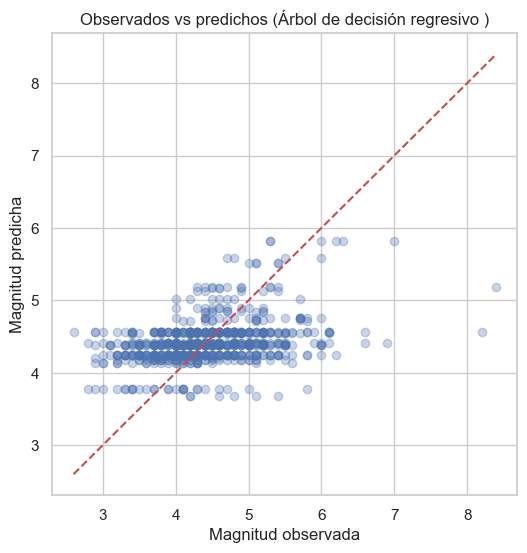

In [12]:
# =============================================================================
# 4.2 Gráfico observados vs predichos para el mejor modelo
# =============================================================================

# Seleccionar el modelo con menor RMSE en test
mejor_idx = df_resultados_reg["RMSE_test"].idxmin()
mejor_modelo_nombre = df_resultados_reg.loc[mejor_idx, "Modelo"]

if "Regresión lineal" in mejor_modelo_nombre:
    mejor_modelo = modelo_lineal
else:
    mejor_modelo = modelo_arbol

y_pred_test = mejor_modelo.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_pred_test, alpha=0.3)
lim_min = min(y_test.min(), y_pred_test.min())
lim_max = max(y_test.max(), y_pred_test.max())
ax.plot([lim_min, lim_max], [lim_min, lim_max], "r--")
ax.set_xlabel("Magnitud observada")
ax.set_ylabel("Magnitud predicha")
ax.set_title(f"Observados vs predichos ({mejor_modelo_nombre})")

guardar_figura(fig, "regresion_observados_vs_predichos")
plt.show()


### 4.3 Discusión de resultados de regresión

La tabla comparativa muestra que el árbol de decisión regresivo obtiene un error absoluto medio (MAE) y un RMSE ligeramente menores que la regresión lineal, junto con un valor de R² más alto. En otras palabras, el árbol explica un poco mejor la variabilidad de la magnitud que el modelo lineal clásico, aunque ambos presentan un poder explicativo limitado en términos absolutos.

Estos resultados son coherentes con la naturaleza del problema: la magnitud de un sismo depende de múltiples factores físicos que no están todos presentes en el dataset. Aun así, el árbol de decisión es capaz de capturar relaciones no lineales entre la magnitud, la latitud, la longitud y la profundidad, generando particiones del espacio que reducen el error en el conjunto de prueba.

Frente a las evaluaciones anteriores, donde solo se trabajaba con una regresión lineal simple para observar tendencias globales, esta comparación aporta una visión más rica. No solo se cuantifica el rendimiento de cada modelo, sino que se evidencia que los enfoques basados en árboles pueden resultar más adecuados cuando se buscan umbrales y reglas de decisión que apoyen la gestión del riesgo sísmico, aun cuando la mejora en métricas sea moderada.


## 5. Métodos de clasificación: árbol lógico y modelo híbrido

En esta sección se trabaja con la variable categórica zona_sismica como etiqueta de salida, utilizando como variables de entrada Latitude, Longitude, Depth y Magnitude. El objetivo es comparar dos enfoques de clasificación:

- Un árbol de decisión lógico, entrenado automáticamente con scikit-learn a partir de los datos históricos.
- Un modelo híbrido basado en un conjunto de árboles de decisión (Random Forest), que combina varios árboles para mejorar la capacidad predictiva a costa de perder algo de interpretabilidad.

A partir de estos modelos se derivan reglas de decisión que pueden representarse como un árbol lógico manual en herramientas como Draw.io o Visio, de forma similar a un árbol genealógico.


Exactitud (accuracy) en test - Árbol lógico: 1.0000
F1-macro en test - Árbol lógico: 1.0000
Figura guardada en: figuras\clasificacion_arbol_matriz_confusion.png


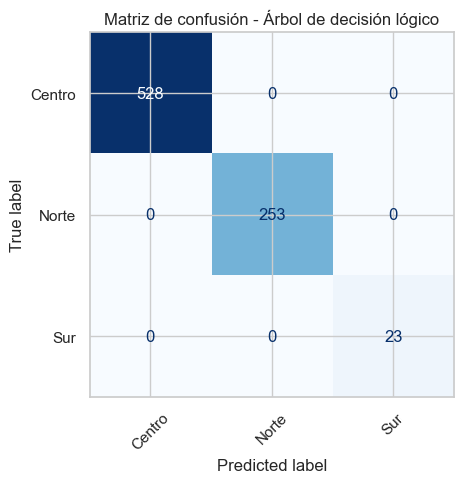

In [13]:
# =============================================================================
# 5.1 Árbol de decisión lógico (clasificación automática)
# =============================================================================

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Variables para clasificación
features_clf = ["Latitude", "Longitude", "Depth", "Magnitude"]
target_clf = "zona_sismica"

df_clf = df.dropna(subset=features_clf + [target_clf]).copy()

Xc = df_clf[features_clf]
yc = df_clf[target_clf]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42, stratify=yc
)

arbol_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_leaf=30,
    random_state=42
)

arbol_clf.fit(Xc_train, yc_train)

yc_pred_test = arbol_clf.predict(Xc_test)

acc_arbol = accuracy_score(yc_test, yc_pred_test)
f1_arbol = f1_score(yc_test, yc_pred_test, average="macro")

print(f"Exactitud (accuracy) en test - Árbol lógico: {acc_arbol:.4f}")
print(f"F1-macro en test - Árbol lógico: {f1_arbol:.4f}")

cm_arbol = confusion_matrix(yc_test, yc_pred_test, labels=arbol_clf.classes_)
disp_arbol = ConfusionMatrixDisplay(confusion_matrix=cm_arbol, display_labels=arbol_clf.classes_)

fig, ax = plt.subplots(figsize=(5, 5))
disp_arbol.plot(ax=ax, cmap="Blues", colorbar=False)
ax.set_title("Matriz de confusión - Árbol de decisión lógico")
plt.xticks(rotation=45)
plt.tight_layout()

guardar_figura(fig, "clasificacion_arbol_matriz_confusion")
plt.show()


Figura guardada en: figuras\clasificacion_arbol_logico.png


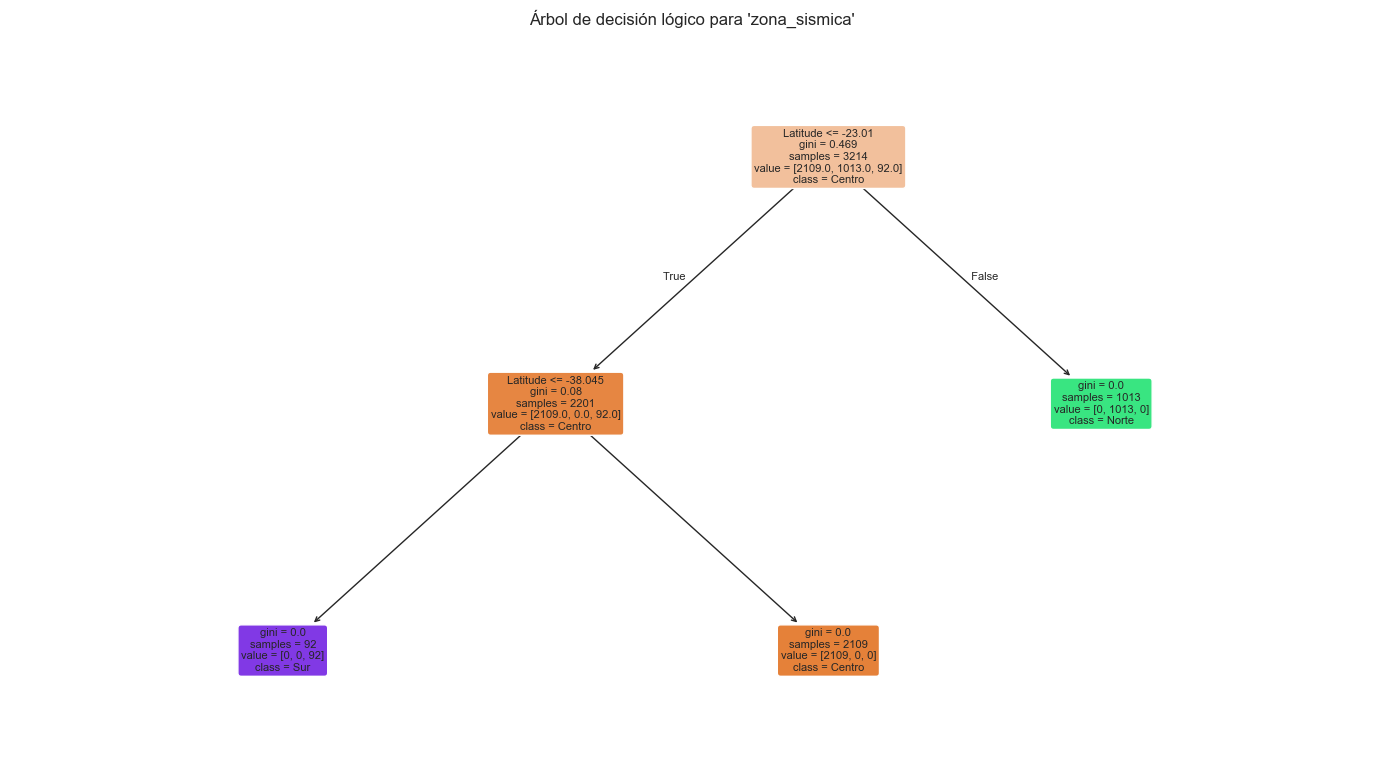

In [14]:
# =============================================================================
# 5.2 Visualización del árbol de decisión lógico
# =============================================================================

fig, ax = plt.subplots(figsize=(14, 8))
plot_tree(
    arbol_clf,
    feature_names=features_clf,
    class_names=arbol_clf.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
ax.set_title("Árbol de decisión lógico para 'zona_sismica'")
plt.tight_layout()

guardar_figura(fig, "clasificacion_arbol_logico")
plt.show()


Exactitud (accuracy) en test - Random Forest: 1.0000
F1-macro en test - Random Forest: 1.0000
Figura guardada en: figuras\clasificacion_random_forest_matriz_confusion.png


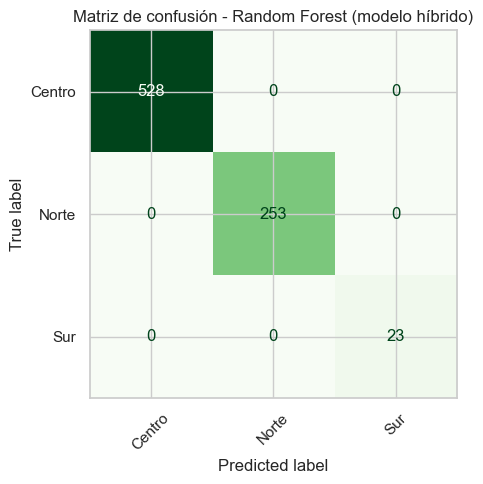

,Modelo,Accuracy_test,F1_macro_test
0,Árbol de decisión lógico,1.0000,1.0000
1,Random Forest (modelo híbrido),1.0000,1.0000


In [15]:
# =============================================================================
# 5.3 Modelo híbrido: Random Forest de clasificación
# =============================================================================

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(Xc_train, yc_train)

yc_pred_rf = rf_clf.predict(Xc_test)

acc_rf = accuracy_score(yc_test, yc_pred_rf)
f1_rf = f1_score(yc_test, yc_pred_rf, average="macro")

print(f"Exactitud (accuracy) en test - Random Forest: {acc_rf:.4f}")
print(f"F1-macro en test - Random Forest: {f1_rf:.4f}")

cm_rf = confusion_matrix(yc_test, yc_pred_rf, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)

fig, ax = plt.subplots(figsize=(5, 5))
disp_rf.plot(ax=ax, cmap="Greens", colorbar=False)
ax.set_title("Matriz de confusión - Random Forest (modelo híbrido)")
plt.xticks(rotation=45)
plt.tight_layout()

guardar_figura(fig, "clasificacion_random_forest_matriz_confusion")
plt.show()

# Tabla comparativa de métricas de clasificación
df_resultados_clf = pd.DataFrame(
    [
        {"Modelo": "Árbol de decisión lógico", "Accuracy_test": acc_arbol, "F1_macro_test": f1_arbol},
        {"Modelo": "Random Forest (modelo híbrido)", "Accuracy_test": acc_rf, "F1_macro_test": f1_rf},
    ]
)
df_resultados_clf


### 5.4 Discusión de clasificación y árbol lógico manual

Los resultados de clasificación muestran que tanto el árbol de decisión lógico como el modelo híbrido de Random Forest son capaces de separar de forma perfecta las tres macrozonas sísmicas (Norte, Centro y Sur) usando las variables Latitude, Longitude, Depth y Magnitude. En el conjunto de prueba, ambos modelos alcanzan un 100 % de exactitud (accuracy) y un F1-macro igual a 1.0, y las matrices de confusión presentan solo valores en la diagonal.

A primera vista, una métrica perfecta podría parecer sospechosa en un problema de clasificación. Sin embargo, en este caso es un comportamiento esperable, porque la etiqueta `zona_sismica` fue construida de manera determinista a partir de la latitud. La regla utilizada en la preparación de datos fue:

- Si la **Latitude** es mayor o igual a aproximadamente \-23°, el evento se etiqueta como **Norte**.
- Si la Latitude es menor o igual a aproximadamente \-38°, el evento se etiqueta como **Sur**.
- Para latitudes intermedias entre esos dos umbrales, el evento se etiqueta como **Centro**.

El árbol de decisión lógico entrenado con scikit-learn redescubre exactamente esta regla, generando cortes muy similares en la latitud (\-23.01° y \-38.045°). Por esta razón, el modelo reproduce sin error la misma lógica que se usó para definir las clases, y obtiene una precisión del 100 % tanto en entrenamiento como en prueba. En otras palabras, no está “adivinando” más allá de los datos, sino replicando una relación que es totalmente determinista en el dataset.

A partir de estas reglas es posible construir un árbol lógico manual, similar a un árbol genealógico, que podría representarse en Draw.io o Visio de la siguiente forma:

- Nodo 1: ¿Latitude > \-23°?
  - Sí → Clasificar como **Norte**.
  - No → Ir a Nodo 2.
- Nodo 2: ¿Latitude ≤ \-38°?
  - Sí → Clasificar como **Sur**.
  - No → Clasificar como **Centro**.

Este esquema resume de manera sencilla la lógica de segmentación territorial del modelo y coincide con la intuición geográfica de las macrozonas sísmicas de Chile.

El modelo de Random Forest, en cambio, utiliza muchos árboles de decisión internos y resulta menos transparente, aunque en este caso no mejora las métricas respecto al árbol simple, precisamente porque la relación entre latitud y zona_sismica ya es completamente lineal por umbrales. Su principal aporte es la robustez para escenarios futuros donde la definición de las clases sea menos rígida o exista ruido en los datos. En este trabajo, dado que la etiqueta está definida de forma exacta a partir de la latitud, el árbol lógico simple es suficiente y tiene la ventaja de poder comunicarse fácilmente a usuarios no técnicos.



### 5.5 Árbol lógico manual de zona_sismica


La figura siguiente muestra el árbol lógico manual construido a partir de los umbrales de latitud definidos en el modelo automático.

![Árbol lógico manual zona_sismica](figuras/arbol_logico_zona_sismica.png)

El árbol se representa como una estructura genealógica, donde cada nodo corresponde a una pregunta sobre la latitud y cada hoja a una macrozona sísmica:

- Nodo raíz: ¿Latitude > −23°?
  - Si la respuesta es **Sí**, el evento se clasifica como **Norte**.
  - Si la respuesta es **No**, se pasa al nodo: ¿Latitude ≤ −38°?
    - Si la respuesta es **Sí**, se clasifica como **Sur**.
    - Si la respuesta es **No**, se clasifica como **Centro**.

Este árbol fue dibujado en Draw.io y exportado como imagen para incluirlo en el informe.


## 6. Clustering jerárquico sobre la actividad sísmica

En esta sección se aplica clustering jerárquico sobre las variables numéricas Latitude, Longitude, Depth y Magnitude, con el objetivo de identificar grupos de eventos sísmicos con patrones similares. 

Primero se utiliza un enfoque jerárquico aditivo (aglomerativo), donde cada observación parte como un clúster individual y se van fusionando sucesivamente hasta formar grupos mayores. Para visualizar este proceso se construye un dendrograma, que permite observar cómo se agrupan los eventos a distintos niveles de distancia.

Posteriormente se definirá un número concreto de clústeres a partir de esta estructura jerárquica y se contrastarán los grupos obtenidos con la variable zona_sismica, para interpretar los resultados desde la perspectiva de negocio y gestión del riesgo.


Figura guardada en: figuras\clustering_jerarquico_dendrograma.png


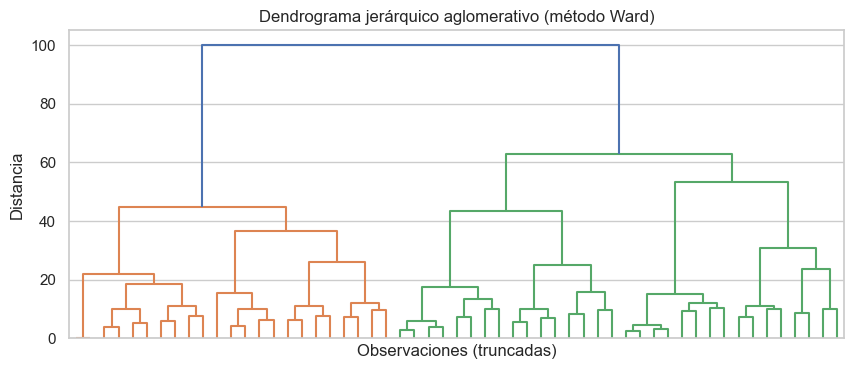

In [16]:
# =============================================================================
# 6.1 Clustering jerárquico aditivo (aglomerativo) – Dendrograma
# =============================================================================

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Variables numéricas a usar en el clustering
features_clust = ["Latitude", "Longitude", "Depth", "Magnitude"]

# Filtrar filas con datos completos
df_clust = df.dropna(subset=features_clust + ["zona_sismica"]).copy()

X_clust = df_clust[features_clust].values

# Estandarización de variables
scaler_clust = StandardScaler()
X_clust_scaled = scaler_clust.fit_transform(X_clust)

# Matriz de enlace jerárquico (método Ward, aglomerativo)
Z = linkage(X_clust_scaled, method="ward")

# Dendrograma truncado para no saturar el gráfico
fig, ax = plt.subplots(figsize=(10, 4))
dendrogram(
    Z,
    truncate_mode="level",  # muestra solo los últimos niveles
    p=5,                    # profundidad del truncado
    no_labels=True
)
ax.set_title("Dendrograma jerárquico aglomerativo (método Ward)")
ax.set_xlabel("Observaciones (truncadas)")
ax.set_ylabel("Distancia")

guardar_figura(fig, "clustering_jerarquico_dendrograma")
plt.show()


Tamaño de cada clúster (aglomerativo, 3 grupos):
cluster_agg3
0    1357
1    1087
2    1574
Name: count, dtype: int64

Tabla cruzada clúster vs zona_sismica:


zona_sismica,Centro,Norte,Sur
cluster_agg3,,,
0,739,618,0
1,429,648,10
2,1469,0,105


Figura guardada en: figuras\clustering_jerarquico_agg3_long_lat.png


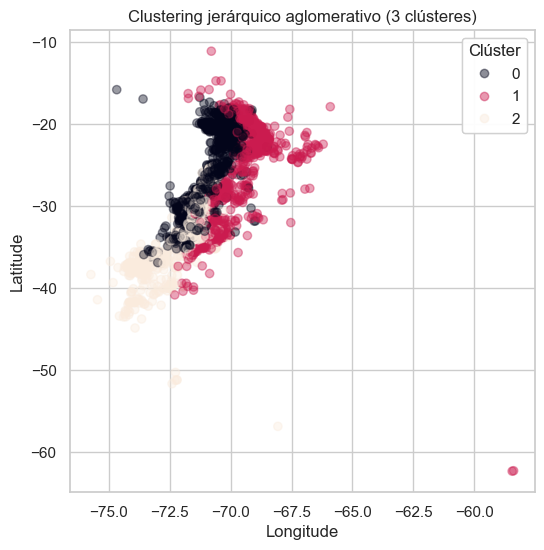

In [18]:
# =============================================================================
# 6.2 Clustering jerárquico aglomerativo con 3 clústeres
# =============================================================================

from sklearn.cluster import AgglomerativeClustering

# Usamos los mismos datos estandarizados X_clust_scaled y df_clust de la celda anterior

agg3 = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"   # distancia euclidiana por defecto
)

labels_agg3 = agg3.fit_predict(X_clust_scaled)
df_clust["cluster_agg3"] = labels_agg3

print("Tamaño de cada clúster (aglomerativo, 3 grupos):")
print(df_clust["cluster_agg3"].value_counts().sort_index())

print("\nTabla cruzada clúster vs zona_sismica:")
display(pd.crosstab(df_clust["cluster_agg3"], df_clust["zona_sismica"]))

# Scatter Longitude vs Latitude coloreado por clúster
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(
    df_clust["Longitude"],
    df_clust["Latitude"],
    c=df_clust["cluster_agg3"],
    alpha=0.4
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Clustering jerárquico aglomerativo (3 clústeres)")
legend1 = ax.legend(*scatter.legend_elements(), title="Clúster")
ax.add_artist(legend1)

guardar_figura(fig, "clustering_jerarquico_agg3_long_lat")
plt.show()


Tamaño de los clústeres iniciales (2 grupos):
cluster_div_temp
0    2404
1    1614
Name: count, dtype: int64

Tamaño de cada clúster (divisivo, 3 grupos):
cluster_div3
0    1614
1     839
2    1565
Name: count, dtype: int64

Tabla cruzada clúster divisivo vs zona_sismica:


zona_sismica,Centro,Norte,Sur
cluster_div3,,,
0,354,1257,3
1,769,2,68
2,1514,7,44


Figura guardada en: figuras\clustering_jerarquico_div3_long_lat.png


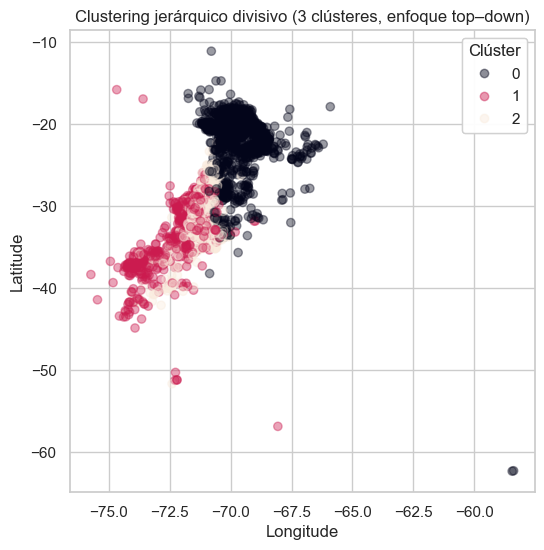

In [19]:
# =============================================================================
# 6.3 Clustering jerárquico divisivo (top–down aproximado con KMeans)
# =============================================================================

from sklearn.cluster import KMeans

# Usamos los mismos datos estandarizados X_clust_scaled y df_clust

# Paso 1: partir el conjunto completo en 2 clústeres
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(X_clust_scaled)

df_clust["cluster_div_temp"] = labels_2

print("Tamaño de los clústeres iniciales (2 grupos):")
print(df_clust["cluster_div_temp"].value_counts().sort_index())

# Paso 2: tomar el clúster más grande y volver a partirlo en 2
cluster_mas_grande = df_clust["cluster_div_temp"].value_counts().idxmax()
mask_grande = df_clust["cluster_div_temp"] == cluster_mas_grande

X_grande = X_clust_scaled[mask_grande]

kmeans_sub = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_sub = kmeans_sub.fit_predict(X_grande)

# Construimos etiquetas finales: 3 clústeres (0, 1, 2)
labels_div3 = np.full(shape=df_clust.shape[0], fill_value=-1, dtype=int)

# Clúster pequeño original se mantiene como clúster 0
cluster_pequeno = 1 - cluster_mas_grande
labels_div3[df_clust["cluster_div_temp"] == cluster_pequeno] = 0

# El clúster grande se divide en 2: etiquetas 1 y 2
labels_div3[mask_grande] = labels_sub + 1  # convierte 0/1 en 1/2

df_clust["cluster_div3"] = labels_div3

print("\nTamaño de cada clúster (divisivo, 3 grupos):")
print(df_clust["cluster_div3"].value_counts().sort_index())

print("\nTabla cruzada clúster divisivo vs zona_sismica:")
display(pd.crosstab(df_clust["cluster_div3"], df_clust["zona_sismica"]))

# Scatter Longitude vs Latitude coloreado por clúster divisivo
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(
    df_clust["Longitude"],
    df_clust["Latitude"],
    c=df_clust["cluster_div3"],
    alpha=0.4
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Clustering jerárquico divisivo (3 clústeres, enfoque top–down)")
legend1 = ax.legend(*scatter.legend_elements(), title="Clúster")
ax.add_artist(legend1)

guardar_figura(fig, "clustering_jerarquico_div3_long_lat")
plt.show()


### 6.4 Discusión de clustering jerárquico (aglomerativo vs divisivo)

El clustering jerárquico aglomerativo con tres clústeres genera grupos relativamente balanceados en tamaño y que siguen bastante bien la estructura latitudinal de Chile. En el mapa Longitude–Latitude se observa que los clústeres se distribuyen a lo largo de la “columna” de sismos, y la tabla cruzada clúster vs zona_sismica muestra que el clúster 2 reúne casi todos los eventos de Centro y Sur, mientras que los clústeres 0 y 1 concentran combinaciones de Centro y Norte. Esto indica que, desde la perspectiva aglomerativa, la frontera entre Norte y Centro no es completamente nítida: existen zonas intermedias donde los eventos comparten características de ambas macrozonas.

En el enfoque divisivo, aproximado mediante particiones sucesivas con KMeans, el primer corte separa el conjunto en dos grandes grupos y luego subdivide el grupo mayor. El resultado final también son tres clústeres de tamaño similar, pero con una interpretación distinta: el clúster 0 queda dominado por eventos del Norte, mientras que los clústeres 1 y 2 agrupan principalmente sismos del Centro (con una franja que incorpora parte del Sur). En el mapa se aprecia que el clúster 0 se concentra en las latitudes más septentrionales, lo que sugiere que el esquema divisivo tiende a aislar primero el Norte y luego refinar la segmentación del Centro–Sur.

En conjunto, ambos métodos coinciden en que la latitud es la variable más influyente en la formación de grupos, pero ofrecen matices distintos sobre cómo se relacionan las macrozonas con los clústeres: el enfoque aglomerativo tiende a fusionar Centro y Sur en un mismo grupo amplio, mientras que el divisivo enfatiza la separación temprana del Norte y una subdivisión posterior de los sismos del Centro. Desde el punto de vista de negocio, estas diferencias permiten contrastar dos formas de agrupar la sismicidad: una más “global”, donde Centro–Sur se consideran una unidad similar, y otra donde se privilegia la identificación temprana de los eventos del Norte como un comportamiento diferenciado.


## Resultados

### Resultados de regresión

La comparación entre la regresión lineal y el árbol de decisión regresivo muestra que:

- El árbol de decisión presenta valores ligeramente menores de MAE y RMSE en el conjunto de prueba, junto con un R² algo mayor.
- Sin embargo, ambos modelos exhiben un poder explicativo limitado (R² bajo), lo que indica que la magnitud de un sismo no se explica completamente solo con latitud, longitud y profundidad.

El gráfico de observados vs predichos evidencia que el árbol tiende a concentrar sus predicciones en un rango acotado de magnitudes, con dificultades para capturar eventos extremos.

### Resultados de clasificación

Para la variable categórica zona_sismica:

- El árbol de decisión lógico y el modelo Random Forest alcanzan un 100 % de exactitud y F1-macro en el conjunto de prueba.
- Las matrices de confusión muestran solo valores en la diagonal, es decir, no hay errores de clasificación.
- El árbol automático genera reglas claras basadas en umbrales de latitud, que se traducen en un árbol lógico manual sencillo: latitudes mayores a aproximadamente −23° se clasifican como Norte, latitudes menores o iguales a −38° como Sur, y el rango intermedio como Centro.

### Resultados de clustering jerárquico

En el enfoque aglomerativo con tres clústeres:

- Los grupos tienen tamaños relativamente balanceados y se distribuyen a lo largo de la franja sísmica de Chile.
- Un clúster agrupa la mayor parte de los eventos de Centro y Sur, mientras que los otros dos concentran combinaciones de Norte y Centro.

En el enfoque divisivo aproximado (top–down):

- El primer corte separa el conjunto en dos grandes grupos y luego subdivide el grupo mayor, obteniendo también tres clústeres de tamaño similar.
- El clúster 0 se encuentra dominado por eventos del Norte, mientras que los clústeres 1 y 2 concentran principalmente eventos del Centro, con algunos sismos del Sur.

Estas diferencias muestran que, aunque la latitud domina la formación de clústeres en ambos enfoques, la forma en que se agrupan Norte, Centro y Sur varía según la estrategia jerárquica aplicada.


## Discusión de resultados e hipótesis

En relación con la hipótesis 1, los resultados apoyan parcialmente la hipótesis. El árbol de decisión regresivo logra métricas de error algo mejores que la regresión lineal, lo que confirma que los modelos basados en árboles capturan relaciones no lineales entre las variables. No obstante, el valor de R² sigue siendo bajo en ambos casos, lo que sugiere que la magnitud está influenciada por factores físicos adicionales que no se encuentran en el dataset. Por lo tanto, H1 se confirma solo en cuanto a la mejora relativa del árbol frente a la regresión lineal, pero no en términos de una capacidad explicativa alta.

Para la parte de clasificación de H, los resultados son más contundentes: los modelos de árbol (lógico y Random Forest) clasifican perfectamente la variable zona_sismica`. Este comportamiento es coherente con la forma en que se construyó la etiqueta: a partir de umbrales de latitud, lo que genera una relación determinista entre la posición del sismo y su macrozona. Aquí los modelos de árbol no solo mejoran la interpretabilidad, sino que permiten extraer reglas explícitas que pueden comunicarse mediante el árbol lógico manual.

Respecto de hipótesis 2, los análisis de clustering jerárquico muestran que los clústeres se alinean en gran medida con la estructura latitudinal del país y con las macrozonas Norte, Centro y Sur, pero no de manera perfecta. El enfoque aglomerativo tiende a fusionar Centro y Sur en un mismo clúster amplio, mientras que el divisivo separa de forma temprana el Norte y luego subdivide los eventos del Centro. Esto indica que los agrupamientos capturan patrones geográficos y de profundidad coherentes con la intuición sísmica, pero también revelan zonas intermedias donde la frontera entre macrozonas es menos clara.

En resumen, los resultados apoyan la idea de que los modelos de árboles y de clustering jerárquico son útiles para describir y segmentar la sismicidad chilena, aunque su capacidad predictiva sobre la magnitud es limitada y los clústeres reflejan tanto las macrozonas tradicionales como transiciones graduales entre ellas.


## Conclusiones y recomendaciones de negocio

1. **Segmentación geográfica clara de la sismicidad.**  
   La combinación de clasificación y clustering confirma que la latitud es un eje fundamental para segmentar la actividad sísmica en Chile. La separación entre Norte, Centro y Sur puede representarse mediante reglas simples, lo que facilita la comunicación del riesgo a actores no técnicos.

2. **Uso de árboles lógicos para comunicación.**  
   El árbol de decisión lógico y su versión manual permiten explicar de forma transparente cómo se asigna cada evento a una macrozona. Esta representación puede integrarse en reportes o paneles de BI destinados a equipos de gestión de emergencia o autoridades locales.

3. **Limitaciones de los modelos de regresión para magnitud.**  
   Aunque el árbol de decisión mejora levemente a la regresión lineal, ninguna de las dos técnicas logra explicar satisfactoriamente la magnitud de los sismos solo con latitud, longitud y profundidad. Para fines de predicción de magnitud sería necesario incorporar variables geológicas adicionales o modelos físicos específicos.

4. **Valor del clustering jerárquico para la exploración.**  
   Los clústeres jerárquicos ofrecen una vista complementaria a la clasificación supervisada, al mostrar grupos de sismos con comportamientos similares sin utilizar la etiqueta zona_sismica. Esto permite explorar subzonas dentro de las macrozonas tradicionales, lo que puede servir como insumo para análisis más detallados de riesgo regional.

5. **Recomendación general.**  
   Para aplicaciones de BI sobre sismicidad, se recomienda utilizar árboles de decisión para la segmentación y comunicación de zonas, y clustering jerárquico como herramienta exploratoria para identificar patrones emergentes o subzonas con comportamientos particulares.


## Discusión metodológica y limitaciones

- **Calidad y origen de los datos.**  
  El dataset proviene de registros oficiales del CSN, lo que entrega una base confiable en términos de fuente. Sin embargo, el trabajo asume que no existen errores sistemáticos en la medición de magnitud, latitud, longitud y profundidad, y no se profundiza en procesos de depuración más avanzados.

- **Variables consideradas.**  
  Se utilizan principalmente variables geométricas (latitud, longitud, profundidad) y la magnitud. No se incorporan características tectónicas, tipo de falla ni propiedades del subsuelo, que podrían mejorar significativamente la capacidad explicativa de los modelos de regresión.

- **Tamaño y periodo de muestra.**  
  El análisis se realiza sobre un periodo específico (aprox. 2012–2025). Aunque la muestra es amplia, representa solo una ventana del comportamiento sísmico del país. Cambios en el horizonte temporal o en la definición de eventos podrían modificar los resultados.

- **Supuestos de los modelos.**  
  La regresión lineal asume relaciones lineales y errores independientes, supuestos que probablemente no se cumplen del todo en sismicidad. Los árboles de decisión y el Random Forest son más flexibles, pero pueden sobreajustar si no se controlan adecuadamente sus hiperparámetros. El clustering jerárquico, por su parte, depende de la métrica de distancia y del método de enlace elegido (Ward en este caso).

- **Reproducibilidad.**  
  Para mejorar la reproducibilidad se fijan semillas aleatorias (`random_state=42`) y se documentan las dependencias en `requirements.txt`. Aun así, pequeñas diferencias en versiones de librerías o en el preprocesamiento podrían generar variaciones menores en los resultados numéricos.

Estas consideraciones deben tenerse en cuenta al interpretar las conclusiones y al extrapolar los resultados a otros periodos o a otros contextos geográficos.


## Referencias

- Centro Sismológico Nacional (CSN). Registros de sismicidad en Chile, datos históricos 2012–2025.    
- Documentación oficial de scikit-learn: https://scikit-learn.org/  
- Documentación oficial de matplotlib y seaborn para visualización de datos.
